### ***This code was used to create Fig 3, S6 and S8***

#### ***Data Preparation***

In [1]:
import pandas as pd 

df = pd.read_csv(r"path_to_decomposed_by_grid_.csv")

c:\Users\USER2\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = df[["gcm",	"scenario", "method", "gcm:scenario", "gcm:method", "scenario:method", "lat_lon"]]

In [3]:
df.rename(columns = {"gcm": "GCMs", 
                     "scenario": "Scenarios",
                     "method": "Scaling Methods",
                     "gcm:scenario": "GCMs x Scenarios",
                     "gcm:method": "GCMs x Scaling Methods",
                     "scenario:method": "Scenarios x Scaling Methods"}, inplace =  True)

In [4]:
df[['lat', 'lon']] = df['lat_lon'].str.split(',', expand=True)
df['lat'] = pd.to_numeric(df['lat'])
df['lon'] = pd.to_numeric(df['lon'])
df.drop(columns=['lat_lon'], inplace=True)

In [5]:
d5 = pd.melt(df, id_vars=['lat', 'lon'], var_name='source')

In [6]:
d5["value"] = d5["value"].clip(lower=0)

C:\Users\USER2\AppData\Local\Temp\ipykernel_61000\447972999.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


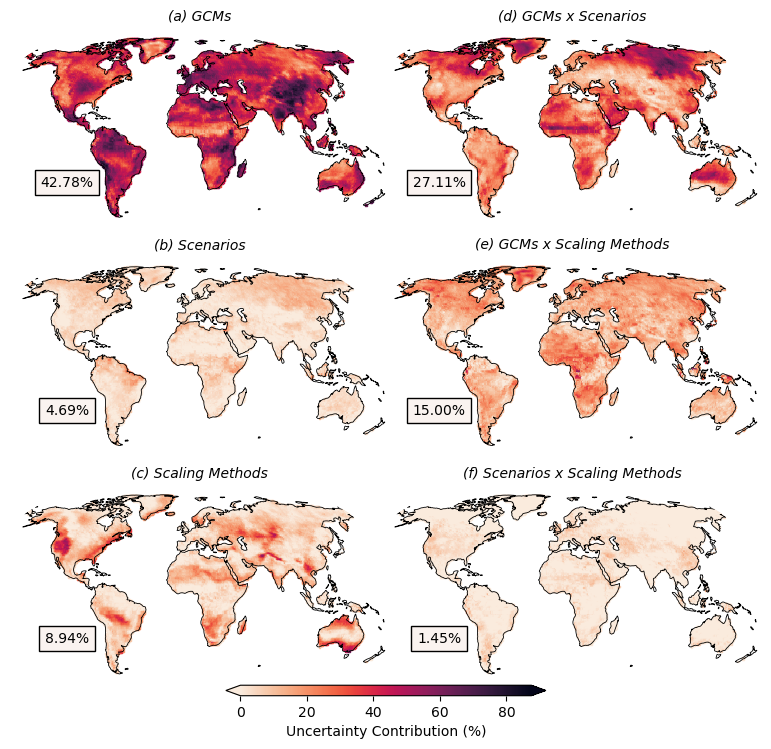

In [9]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

fig, axes = plt.subplots(3, 2, figsize=(8, 7), subplot_kw={'projection': ccrs.Robinson()})
sources = d5['source'].unique()

norm = plt.Normalize(d5["value"].min()*100, d5["value"].max()*100)

labels = ['a', 'b', 'c', 'd', 'e', 'f']

subplot_indices = [(0, 0), (1, 0), (2, 0), (0, 1), (1, 1), (2, 1)]

for i, (label, (row, col)) in enumerate(zip(labels, subplot_indices)):
    ax = axes[row, col]
    source = sources[i]
    subset = d5[d5['source'] == source]
    lons = subset['lon'].values
    lats = subset['lat'].values
    precipitation = subset["value"].values * 100
    
    ax.set_title(f"({label}) {source}", fontsize=10, y=1.03, style="italic")

    num_colors = 1000
    cmap = sns.color_palette(palette='rocket_r', as_cmap=True)

    xy = ax.projection.transform_points(ccrs.PlateCarree(), lons, lats)

    sc = ax.scatter(xy[:, 0], xy[:, 1], c=precipitation, cmap=cmap, norm=norm, s=1, marker="s")
    ax.coastlines(linewidth=0.6)
    ax.set_frame_on(False)

    source_avg = subset["value"].mean() * 100

    ax.text(0.15, 0.2, f'{source_avg:.2f}%', transform=ax.transAxes,
            fontsize=10, ha='center', bbox=dict(facecolor='#FAF3F0', edgecolor='black', boxstyle='square,pad=0.4'))

# Add a single colorbar
cbar_ax = fig.add_axes([0.3, 0, 0.4, 0.015]) 
cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal', label='Uncertainty Contribution (%)', extend="both")

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.3, top=0.95, wspace = 0.1, hspace = 0.01)  

plt.tight_layout()

plt.savefig("save_path.png", dpi=600,bbox_inches='tight')

plt.show()
